In [14]:

from gensim import corpora,  models
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation
import emoji
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [15]:
tweets=pd.read_csv("#arequipaFiltrado.csv")
tweets.head()

,tweet,username,language
0,#AREQUIPA Sujetos habrían cometido robos entre...,informativoaqp,es
1,Energías positivas a mí... 🤪 #Arequipa #travel...,nanyalvites,es
2,🔵🔴¡Buenos días! 🇵🇪 Esta es la portada de Exito...,exitosape,es
3,#RUNASUR: El gran pedazo de territorio peruano...,contraapostasia,es
4,Cursos de Manejo Exclusivos para Damas en Areq...,charora15873572,es


In [16]:
corpus=tweets['tweet'].to_list()
#palabrasEvitar=['amp','covid','0','1','2','3','4','5','6','7','8','9']
palabrasEvitar=['rt', 'via', 'amp', 'http', 'https', 'm', 're', 'co','#arequipa','arequipa']
list_punctuation=list(punctuation)+['¿']
list_punctuation.remove('@')
list_punctuation.remove('#')
listaStopwords=stopwords.words('spanish')+palabrasEvitar
lemmatizer = WordNetLemmatizer()


#minusculas
corpus=[ str(document).lower() for document in corpus]

#urls
corpus=[re.sub('http[s]?://\S+', '', word) for word in corpus]

#emojis
corpus=[emoji.get_emoji_regexp().sub(u'', word) for word in corpus]

#punctuacion
corpus=[word.translate(str.maketrans('','', ''.join(list_punctuation))) for word in corpus]
#corpus=[re.sub('[0-9]+', '', word) for word in corpus]

#tokenizar y lemmatizar
texts=[[lemmatizer.lemmatize(word) for word in str(document).split() if word not in listaStopwords] for document in corpus]

print(texts[0:5])



<>:15: DeprecationWarning: invalid escape sequence \S
<>:15: DeprecationWarning: invalid escape sequence \S
/tmp/ipykernel_5991/3300721014.py:15: DeprecationWarning: invalid escape sequence \S
  corpus=[re.sub('http[s]?://\S+', '', word) for word in corpus]


[['sujetos', 'cometido', 'robos', '30', '31', 'octubre', 'fiesta', 'halloween', 'canción', 'criolla', 'cerro', 'colorado', '@fiscaliaperu', '@policiaperu'], ['energías', 'positivas', '#travelphotography', '#friendship', '@', 'reserva', 'nacional', 'salina', 'salar'], ['¡buenos', 'días', 'portada', 'exitosa', 'sur', 'hoy', 'viernes', '5', 'noviembre', '2021', '#gabinete', '#votodeconfianza', '#cáceres', 'radio', 'exitosa', '955', 'fm', 'exitosa', 'tv', '61', 'señal', 'digital', 'abierta'], ['#runasur', 'gran', 'pedazo', 'territorio', 'peruano', '#moquegua', '#puno', '#tacna', 'pasa', 'manos', '#bolivia'], ['cursos', 'manejo', 'exclusivos', 'dama', '#licenciasdeconducir', '#academiademanejo', '#paucarpata']]


In [17]:
dictionary=corpora.Dictionary(texts)
corpus=[dictionary.doc2bow(text) for text in texts]
print(dictionary)

Dictionary(8448 unique tokens: ['30', '31', '@fiscaliaperu', '@policiaperu', 'canción']...)


In [5]:
cantidadTopicos=5
lda=models.LdaModel(corpus,id2word=dictionary,num_topics=cantidadTopicos, alpha='auto', eval_every=5)
lda.show_topics(cantidadTopicos,3)

[(0, '0.012*"exitosa" + 0.012*"octubre" + 0.007*"años"'),
 (1, '0.008*"gobernador" + 0.007*"hoy" + 0.007*"octubre"'),
 (2, '0.010*"12" + 0.008*"cáceres" + 0.007*"gobernador"'),
 (3, '0.009*"regional" + 0.009*"llica" + 0.008*"cáceres"'),
 (4, '0.012*"pacientes" + 0.008*"regional" + 0.007*"noticias"')]

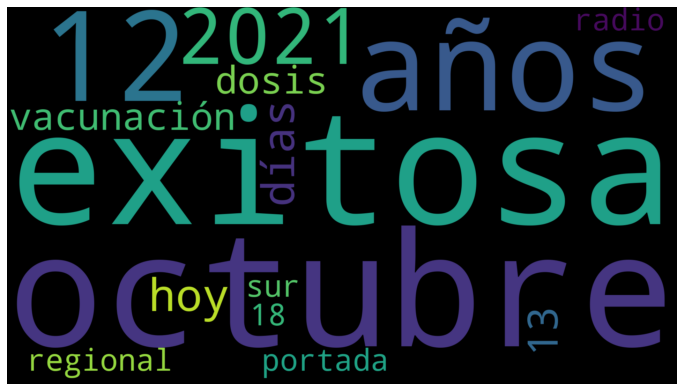

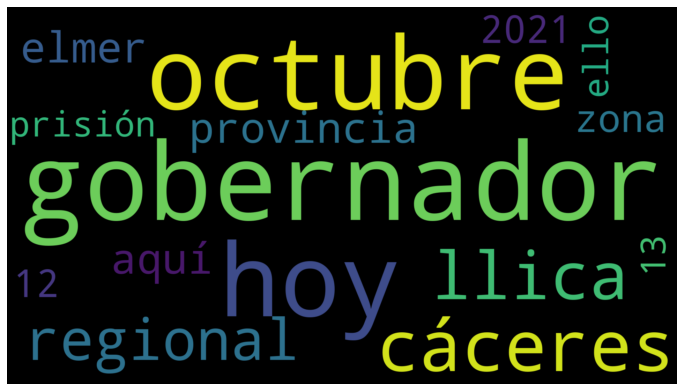

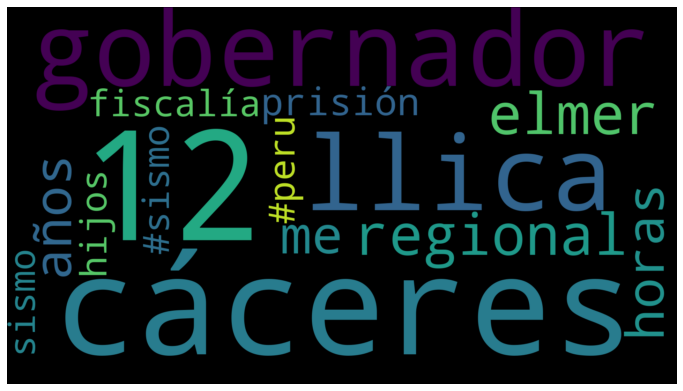

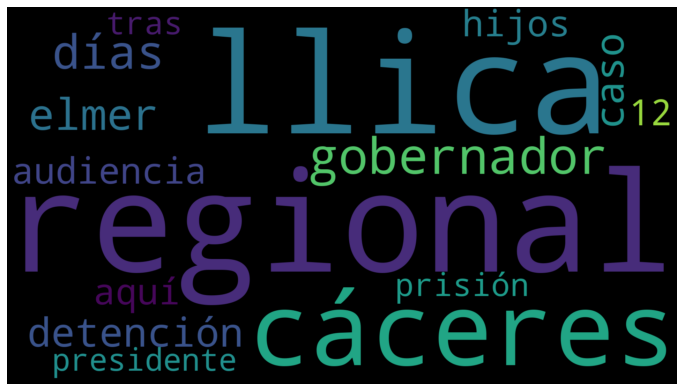

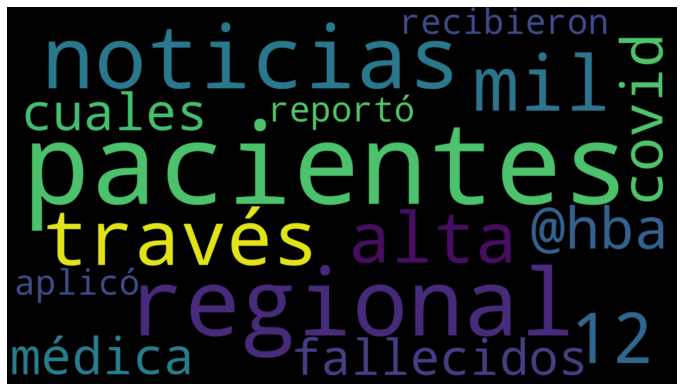

In [18]:
curr_topic = 0
for l in lda.print_topics(cantidadTopicos,num_words=15):
    line = l[1]
    scores = [float(x.split("*")[0]) for x in line.split(" + ")]
    words = [re.sub('\"', '', x.split("*")[1]) for x in line.split(" + ")]
    freqs = []

    freqs=dict(zip(words, scores))
    elements = WordCloud(width=1920, height=1080).generate_from_frequencies(freqs)


    plt.rcParams['figure.figsize'] = 12, 8
    plt.imshow(elements, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    curr_topic += 1

In [19]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(lda, corpus, dictionary)
lda_viz

/home/oem/.local/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.083832  0.096668       1        1  21.199516
4      0.067830 -0.164701       2        1  20.716945
2     -0.000941  0.032786       3        1  19.872957
0     -0.180125 -0.009843       4        1  19.179937
1      0.029404  0.045089       5        1  19.030645, topic_info=          Term        Freq       Total Category  logprob  loglift
33     exitosa  153.000000  153.000000  Default  30.0000  30.0000
372  pacientes  176.000000  176.000000  Default  29.0000  29.0000
11     octubre  309.000000  309.000000  Default  28.0000  28.0000
32        días  203.000000  203.000000  Default  27.0000  27.0000
38       radio   66.000000   66.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
816         13   45.366552  224.297651   Topic5  -5.5623   0.0609
592      hijos   40.089751  173.946278   Topic5  -5.6859   0.1915
368        mil   38.189055  150.634448   Topic5  -5.7345   0.2868
429    #elbuho   34.466173  160.704997   Topic5  -5.8371   0.1195
36   noviembre   33.865393  131.222236   Topic5  -5.8547   0.3046

[377 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
4028      4  0.949215  #anghelohuerta
1921      2  0.056350       #apurímac
1921      3  0.788904       #apurímac
1921      5  0.112701       #apurímac
1645      2  0.970896         #camaná
...     ...       ...             ...
594       4  0.069130            ‘los
594       5  0.172825            ‘los
1151      1  0.779530            “los
1151      3  0.043307            “los
1151      5  0.129922            “los

[810 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 3, 1, 2])